<a href="https://colab.research.google.com/github/Batman511/Numerical_methods_6sem/blob/main/2)%D0%A3%D1%80%D0%B0%D0%B2%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D1%82%D0%B5%D0%BF%D0%BB%D0%BE%D0%BF%D1%80%D0%BE%D0%B2%D0%BE%D0%B4%D0%BD%D0%BE%D1%81%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
koef_a = 1
f = lambda x, t: 2*x*t+ (1+np.tanh(x-t) - 2*(np.tanh(x-t))**2)/np.cosh(x-t)
solution  = lambda x, t: 1/np.cosh(x-t) +x*t**2

#начальные условия
phi = lambda x: 1/np.cosh(x)

#граничные условия
a0 = 1
a1 = 0
b0 = 1
b1 = 1
gamma1 = lambda t: t**2 + (1+np.tanh(t))/np.cosh(t) 
gamma2 = lambda t: t**2 + 1/np.cosh(1-t) 

# сетка
xmin =  0
xmax = 1
h = 0.05

tmin = 0
tmax = 1
tau = 0.05

Прогонка

In [ ]:
def Progonka(a, b, c, f):
#-------------------Прямой ход-------------------------------
    LENGTH = len(a) - 1

    A = np.zeros(len(a))
    B = np.zeros(len(a))

    A[0] = -c[0] / b[0]
    B[0] = f[0] / b[0]

    for i in range(1, LENGTH):
        A[i] = -c[i] / (b[i] + a[i]*A[i-1])
    for i in range(1, LENGTH):
        B[i] = (f[i] - a[i]*B[i-1]) / (b[i] + a[i]*A[i-1])

    A[-1] = 0
    B[-1] = (f[-1] - a[-1]*B[-2]) / (b[-1] + a[-1]*A[-2])

#-------------------Обратный ход-----------------------------
    y = np.zeros(len(a))
    y[-1] = B[-1]
    for i in range(LENGTH - 1, -1, -1):
        y[i] = B[i] + A[i]*y[i+1]

    return y    

## Разностное решение 1 порядка точности

In [ ]:
def next_line_1(u, tau, sigma, step, h):
    xk = np.arange(xmin, xmax+h, h)
    
    a = np.zeros(len(xk))
    b = np.zeros(len(xk))
    c = np.zeros(len(xk))
    d = np.zeros(len(xk))

    d[0] = gamma1(step*tau)
    d[-1] = gamma2(step*tau)

    b[0] = -(a0/h) + b0
    c[0] = a0/h

    b[-1] = (a1 / h) + b1
    a[-1] = -a1/h

    for i in range(1, len(xk)-1):
        a[i] = tau * koef_a**2* sigma / h**2
        b[i] = -1 - 2 * tau * koef_a**2 * sigma/ h**2
        c[i] = tau * koef_a**2* sigma / h**2
        d[i] = - u[i] -tau * f(xk[i], (step - 0.5)*tau) +(sigma-1)*(tau * koef_a**2 / h ** 2)*(u[i+1] - 2*u[i] + u[i-1])

    return Progonka(a, b, c, d)

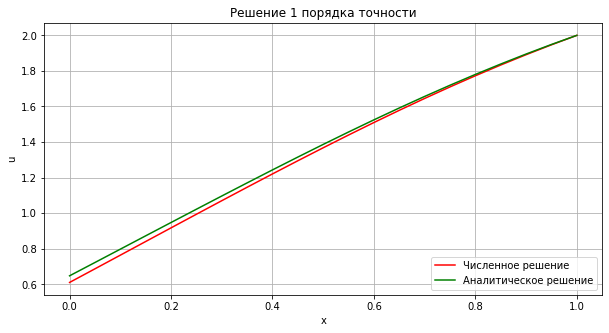

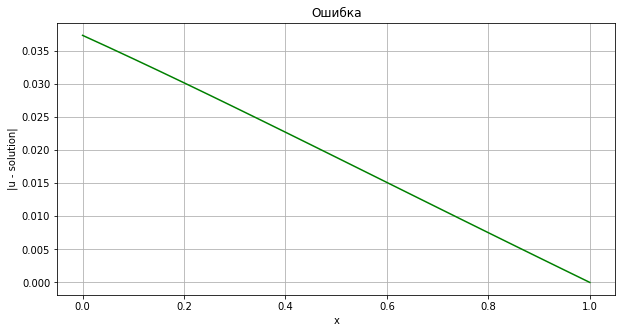

In [ ]:
sigma = 1/2
xk_cur = np.arange(xmin, xmax + h, h)
tn_cur = np.arange(tmin, tmax + tau , tau)

solution_1 = [solution(xk_cur[k],tn_cur[-1]) for k in range(len(xk_cur))]
y_ = [phi(xk_cur[i]) for i in range(len(xk_cur))]
y_numeric = []

for step in range(1, len(tn_cur)):
    y_numeric = next_line_1(y_, tau, sigma, step, h)
    y_ = y_numeric.copy()

diff1 = [abs(solution_1[i] - y_numeric[i]) for i in range(len(solution_1))]

plt.figure(figsize=(10,5))
plt.title("Решение 1 порядка точности")
plt.xlabel("x")
plt.ylabel("u")
plt.grid()
plt.plot(xk_cur, y_numeric, color='red',label="Численное решение")
plt.plot(xk_cur, solution_1 ,color='green',label="Аналитическое решение")
plt.legend(loc='lower right')

plt.figure(figsize=(10,5))
plt.title("Ошибка")
plt.xlabel("x")
plt.ylabel("|u - solution|")
plt.grid()
plt.plot(xk_cur, diff1,color='green')

## Разностное решение 2 порядка точности

In [ ]:
def next_line_2(u, tau, sigma, step, h):

    xk = np.arange(xmin, xmax+h, h)

    a = np.zeros(len(xk))
    b = np.zeros(len(xk))
    c = np.zeros(len(xk))
    d = np.zeros(len(xk))

    if a0 == 0:
        b[0] = b0
        d[0] = gamma1(step*tau)
    else:
        b[0] = 1 - koef_a ** 2 * tau / (h ** 2 * 2) * (-2 + b0 * 2 * h / a0)
        c[0] = - koef_a ** 2 * tau / h ** 2
        d[0] = u[0]+koef_a**2*tau/(2*h**2)*(-gamma1(step*tau)*2*h/a0 + u[1] - 2*u[0]+u[1] - (gamma1((step-1)*tau)-b0*u[0])*2*h/a0) + tau*f(xk[0], (step - 0.5)*tau)

    if a1 == 0:
        b[-1] = b1
        d[-1] = gamma2(step*tau)
    else:
        d[-1] = u[0]+koef_a**2*tau/(2*h**2)*(gamma2(step*tau)*2*h/a1 + u[-2] - 2*u[-1]+u[-2] + (gamma2((step-1)*tau)-b1*u[0])*2*h/a1) + tau*f(xk[-1], (step - 0.5)*tau)
        b[-1] = 1 - koef_a**2*tau/(h**2*2)*(-2 - b1*2*h/a1)
        a[-1] = - koef_a**2*tau/h**2

    for i in range(1, len(xk) - 1):
        a[i] = tau * koef_a ** 2 * sigma / h ** 2
        b[i] = -1 - 2 * tau * koef_a ** 2 * sigma / h ** 2
        c[i] = tau * koef_a ** 2 * sigma / h ** 2
        d[i] = - u[i] - tau * f(xk[i], (step - 0.5) * tau) + (sigma - 1) * (tau * koef_a ** 2 / h ** 2) * (u[i + 1] - 2 * u[i] + u[i - 1])

    return Progonka(a, b, c, d)

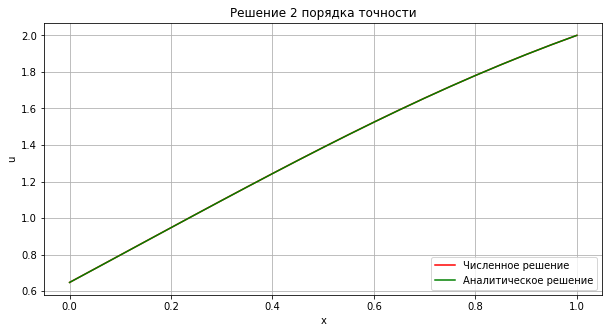

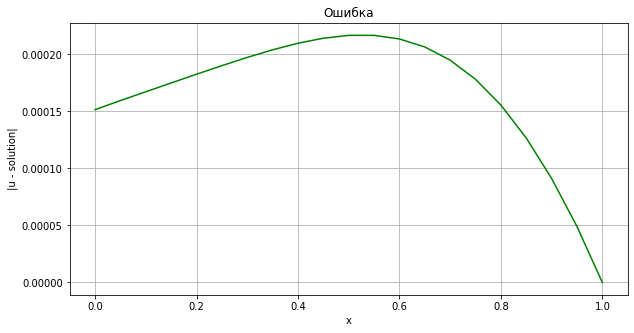

In [ ]:
y_ = [phi(xk_cur[i]) for i in range(len(xk_cur))]
y_numeric2 = []
for step in range(1, len(tn_cur)):
    y_numeric2 = next_line_2(y_, tau, sigma, step, h)
    y_ = y_numeric2.copy()

diff2 = [abs(solution_1[i] - y_numeric2[i]) for i in range(len(solution_1))]

plt.figure(figsize=(10,5))
plt.title("Решение 2 порядка точности")
plt.xlabel("x")
plt.ylabel("u")
plt.grid()
plt.plot(xk_cur, y_numeric2, color='red',label="Численное решение")
plt.plot(xk_cur, solution_1 ,color='green',label="Аналитическое решение")
plt.legend(loc='lower right')

plt.figure(figsize=(10,5))
plt.title("Ошибка")
plt.xlabel("x")
plt.ylabel("|u - solution|")
plt.grid()
plt.plot(xk_cur, diff2,color='green')

## Зависимость ошибки от шага

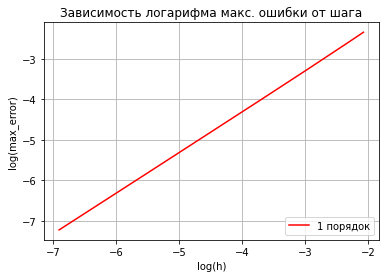

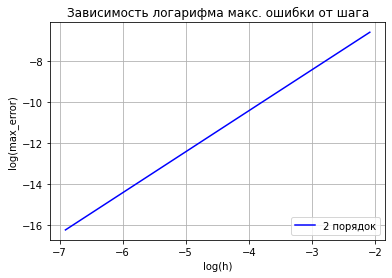

In [ ]:
hrange =  [0.001, 0.002 ,0.005, 0.025, 0.05, 0.1,  0.125 ]
# hrange = np.arange(0.025,0.125,0.025)

error_1 = np.zeros(len(hrange))
error_2 = np.zeros(len(hrange))

for j in range(len(hrange)):
    hi = hrange[j]
    t = hi
    tn_h = np.arange(tmin, tmax+t, t)
    xk_h = np.arange(xmin, xmax+hi, hi)
    u1 = [phi(xk_h[i]) for i in range(len(xk_h))]
    y_1, y_2 = np.zeros(len(xk_h)),  [0 for i in range(len(xk_h))]
    u2 = [phi(xk_h[i]) for i in range(len(xk_h))]
     
    y_real = [solution(xk_h[k], tn_h[-1]) for k in range(len(xk_h))]
    for i in range(1, len(tn_h)):
        y_1, y_2  = next_line_1(u1, t, sigma, i,  hi), next_line_2(u2, t, sigma, i,  hi)
        u1, u2  = y_1.copy(),  y_2.copy()
         
    error_1[j] = np.log(max([abs(y_1[j] - y_real[j]) for j in range(len(y_real))]))
    error_2[j] = np.log(max([abs(y_2[j] - y_real[j]) for j in range(len(y_real))]))

plt.figure()
plt.title("Зависимость логарифма макс. ошибки от шага")
plt.xlabel("log(h)")
plt.ylabel("log(max_error)")
plt.grid()
plt.plot(np.log(hrange), error_1, color='red',label="1 порядок")
plt.legend(loc='lower right')

plt.figure()
plt.title("Зависимость логарифма макс. ошибки от шага")
plt.xlabel("log(h)")
plt.ylabel("log(max_error)")
plt.grid()
plt.plot(np.log(hrange), error_2, color='blue',label="2 порядок")
plt.legend(loc='lower right')
# по графику видно, что теоретическая точность подтверждается

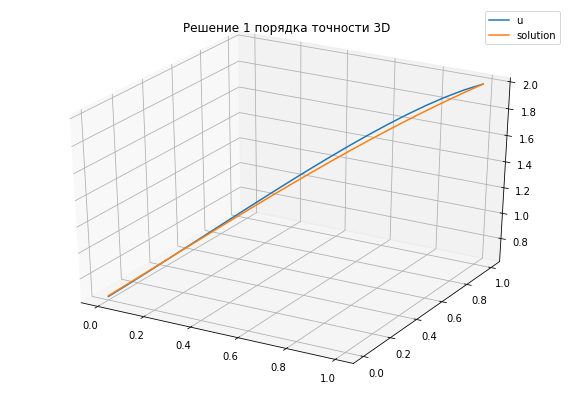

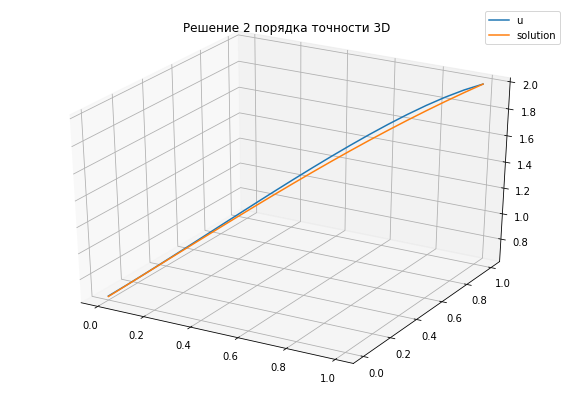

In [ ]:
x = np.arange(xmin, xmax+h, h)
y = np.arange(tmin, tmax+tau,tau)
z1 = next_line_1(y_, tau, sigma, step, h)
z2 = next_line_2(y_, tau, sigma, step, h)
s = solution_1

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Решение 1 порядка точности 3D")
ax.plot(x, y, z1, label='u')
ax.plot(x, y, s, label='solution')
ax.legend(loc='upper right')

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Решение 2 порядка точности 3D")
ax.plot(x, y, z2, label='u')
ax.plot(x, y, s, label='solution')
ax.legend(loc='upper right')